In [1]:
#Importing Libraries & Data
# Loading the required Python libraries/packages

# For data loading and manipulation
import pandas as pd
import numpy as np
from sklearn import datasets

c:\Users\Aqsa\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# For Visualization/EDA
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# For data science and machine learning techniques
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC

In [4]:
!pip install xgboost

In [6]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [7]:
# To create the interactive components
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
glass_df = pd.read_excel("glass.xlsx", sheet_name='glass',header=0)
glass_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [11]:
glass_df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [12]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [13]:
glass_df.describe() 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


## Exploratory Data Analysis

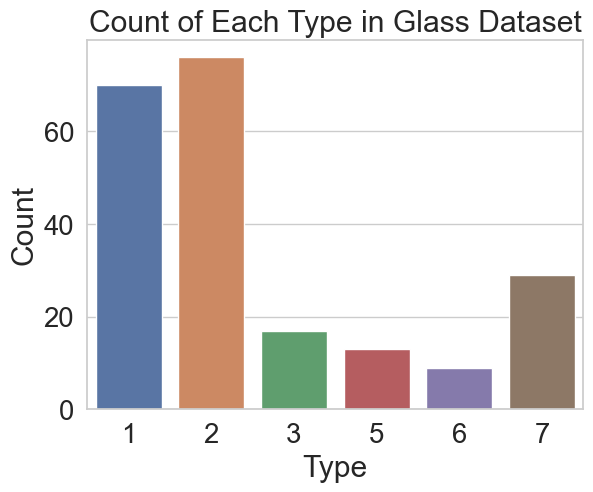

In [72]:
sns.countplot(x='Type', data=glass_df)  # Adjust 'Type' to your actual column name
plt.title('Count of Each Type in Glass Dataset')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [16]:
# Checked both mean and median. mean seemed more informative
glass_df.groupby('Type', as_index=False).mean()

,Type,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1,1.518718,13.242286,3.552429,1.163857,72.619143,0.447429,8.797286,0.012714,0.057000
1,2,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
2,3,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059
3,5,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
4,6,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
5,7,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448


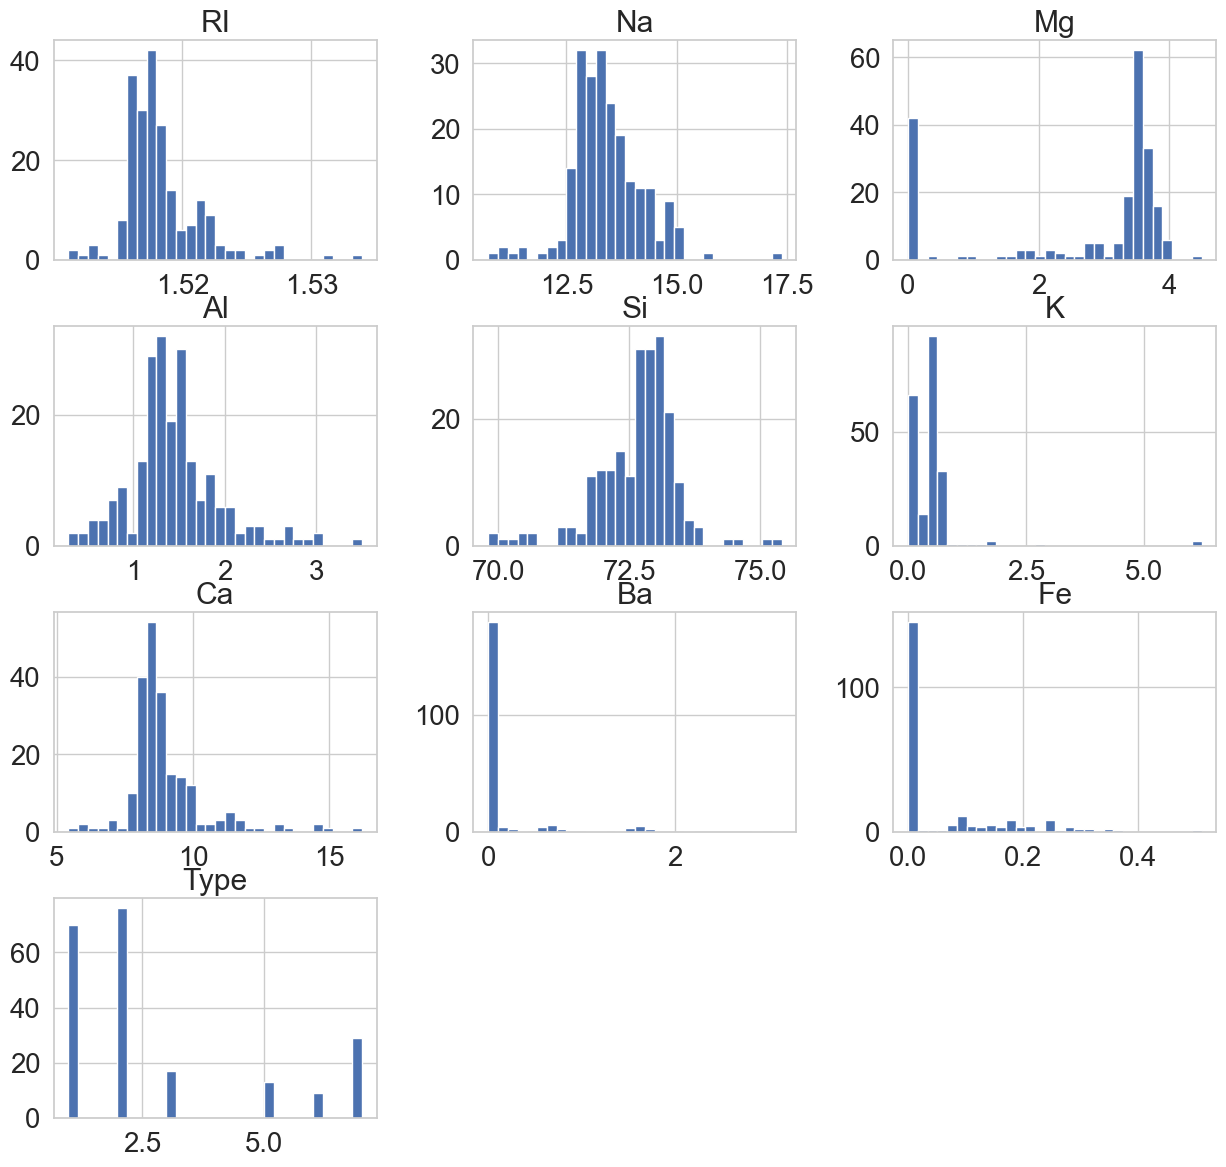

In [77]:
# Visualization: Histograms
glass_df.hist(bins=30, figsize=(15,14))
plt.show()

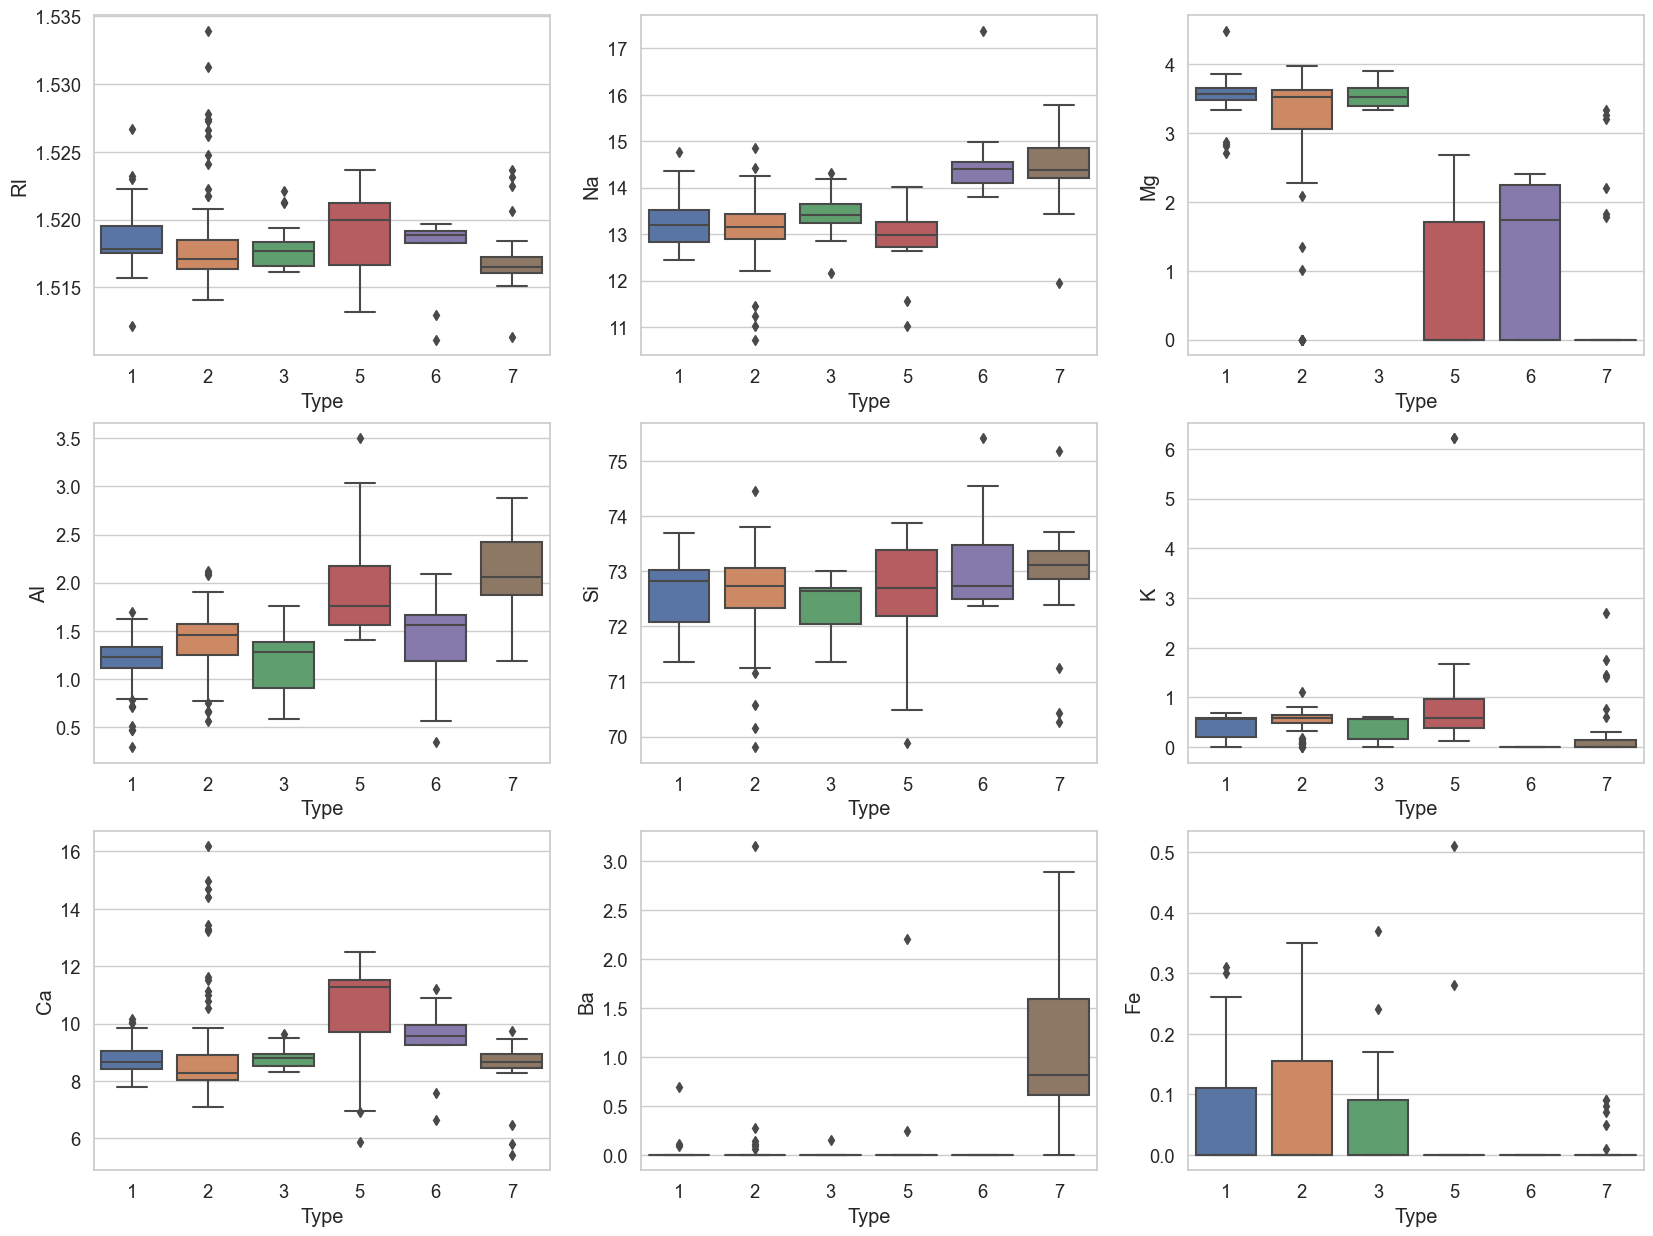

In [17]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x='Type', y='RI', data=glass_df)
plt.subplot(3,3,2)
sns.boxplot(x='Type', y='Na', data=glass_df)
plt.subplot(3,3,3)
sns.boxplot(x='Type', y='Mg', data=glass_df)
plt.subplot(3,3,4)
sns.boxplot(x='Type', y='Al', data=glass_df)
plt.subplot(3,3,5)
sns.boxplot(x='Type', y='Si', data=glass_df)
plt.subplot(3,3,6)
sns.boxplot(x='Type', y='K', data=glass_df)
plt.subplot(3,3,7)
sns.boxplot(x='Type', y='Ca', data=glass_df)
plt.subplot(3,3,8)
sns.boxplot(x='Type', y='Ba', data=glass_df)
plt.subplot(3,3,9)
sns.boxplot(x='Type', y='Fe', data=glass_df)
plt.show()

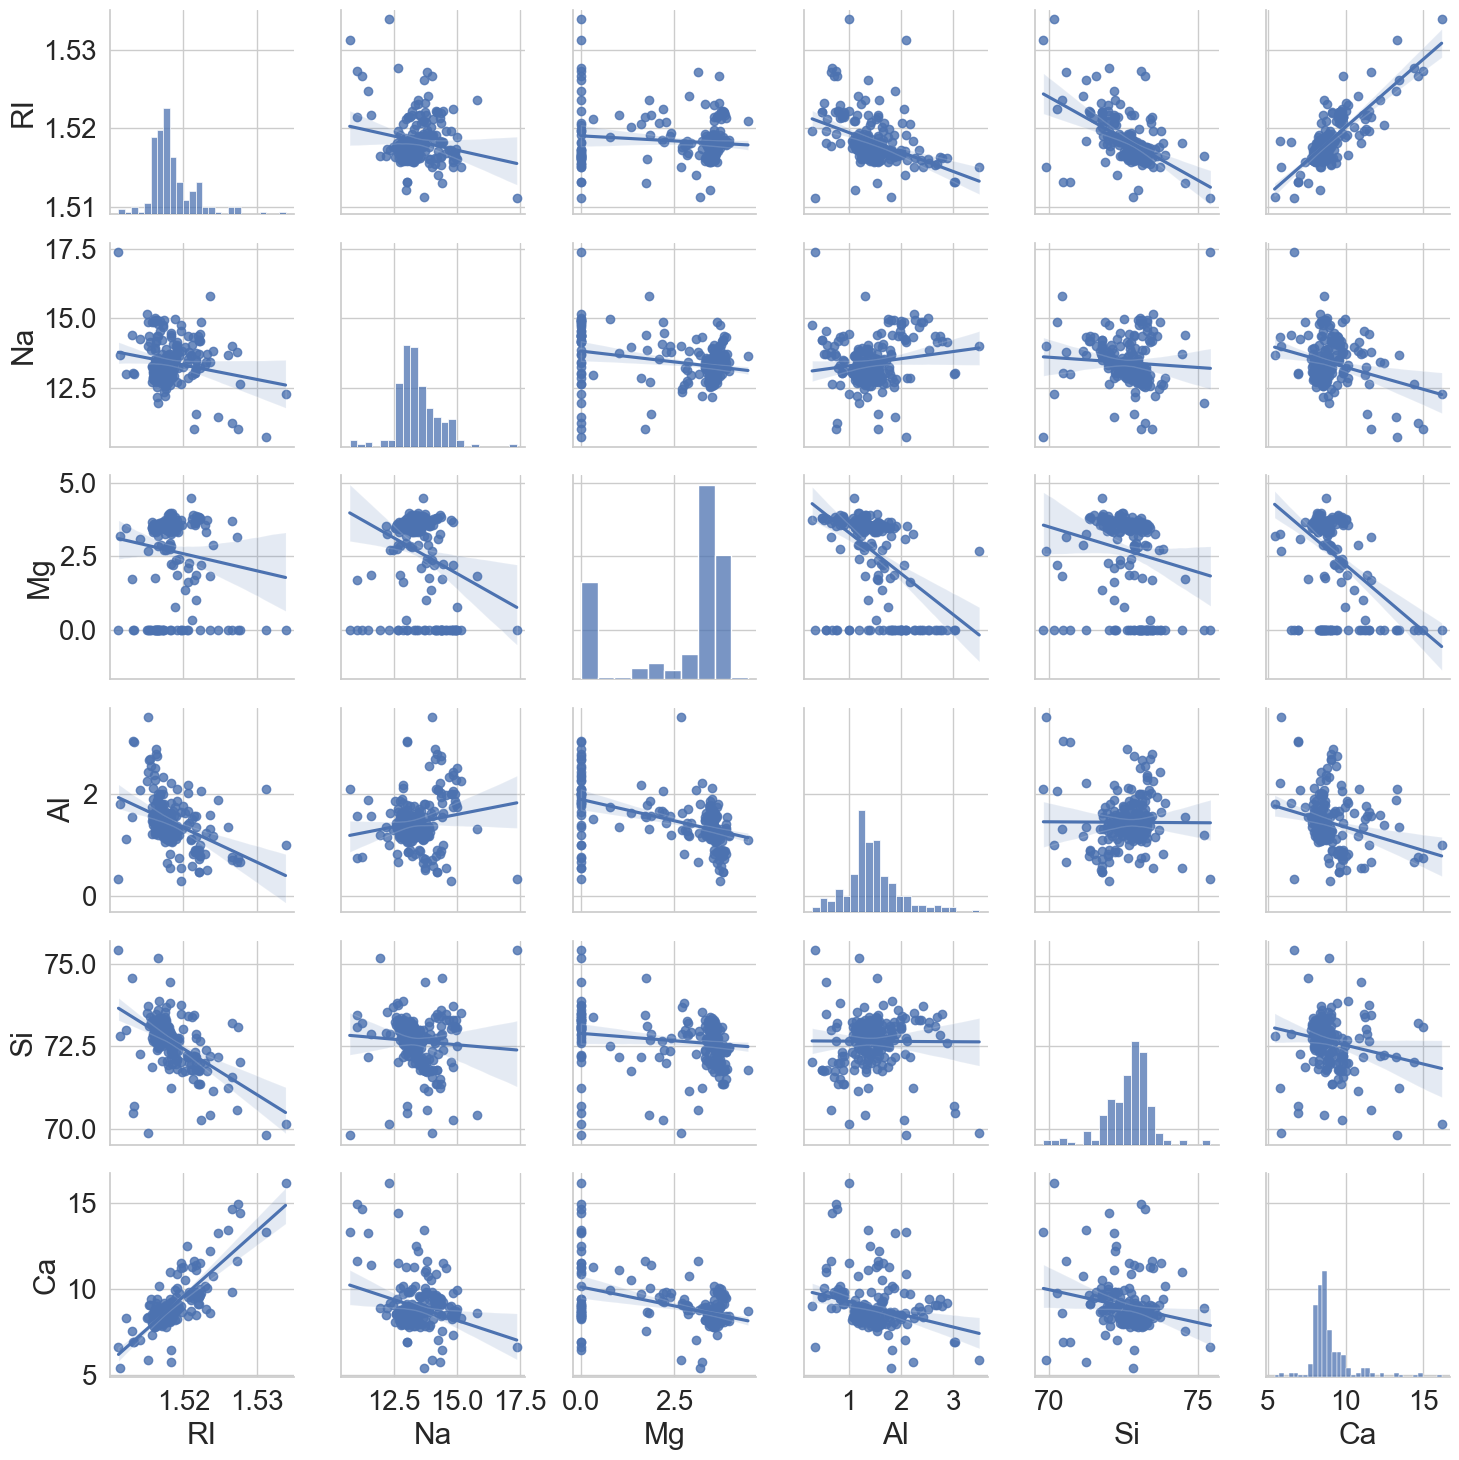

In [19]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
sns.pairplot(glass_df[['RI','Na','Mg','Al','Si','Ca']], kind='reg')

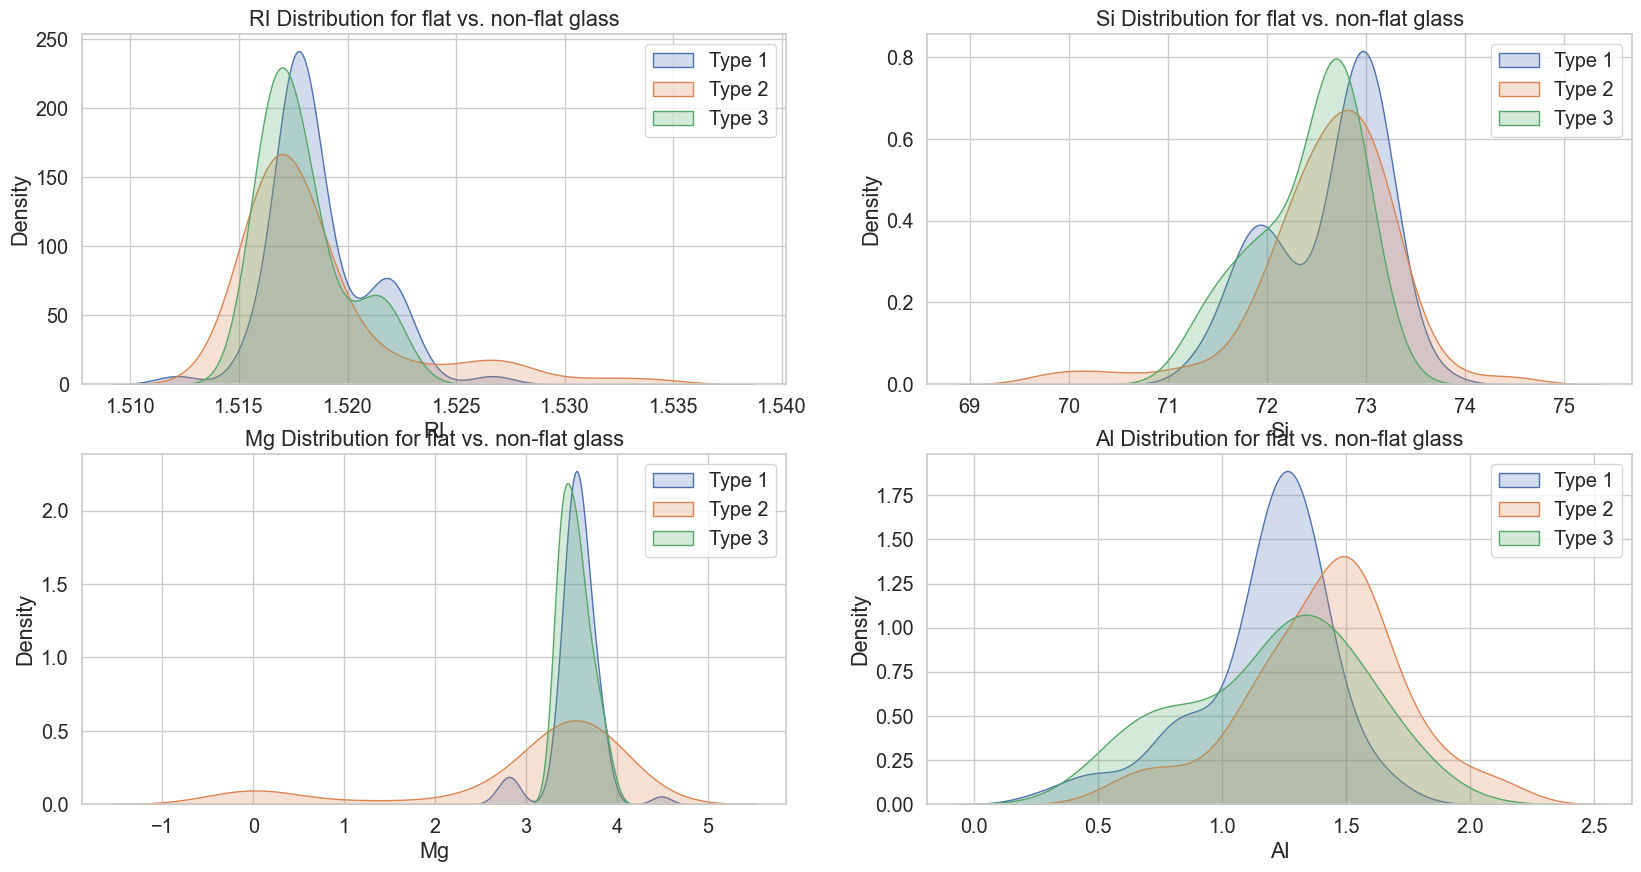

In [20]:
sns.set(style="whitegrid", font_scale=1.3)
plt.subplots(figsize = (20,10))
plt.subplot(2,2,1)
sns.kdeplot(glass_df["RI"][glass_df.Type == 1], shade = True)
sns.kdeplot(glass_df["RI"][glass_df.Type == 2], shade = True)
sns.kdeplot(glass_df["RI"][glass_df.Type == 3], shade = True)
plt.title("RI Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,2)
sns.kdeplot(glass_df["Si"][glass_df.Type == 1], shade = True)
sns.kdeplot(glass_df["Si"][glass_df.Type == 2], shade = True)
sns.kdeplot(glass_df["Si"][glass_df.Type == 3], shade = True)
plt.title("Si Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,3)
sns.kdeplot(glass_df["Mg"][glass_df.Type == 1], shade = True)
sns.kdeplot(glass_df["Mg"][glass_df.Type == 2], shade = True)
sns.kdeplot(glass_df["Mg"][glass_df.Type == 3], shade = True)
plt.title("Mg Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,4)
sns.kdeplot(glass_df["Al"][glass_df.Type == 1], shade = True)
sns.kdeplot(glass_df["Al"][glass_df.Type == 2], shade = True)
sns.kdeplot(glass_df["Al"][glass_df.Type == 3], shade = True)
plt.title("Al Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])

## Feature Selection using PCA

<Axes: >

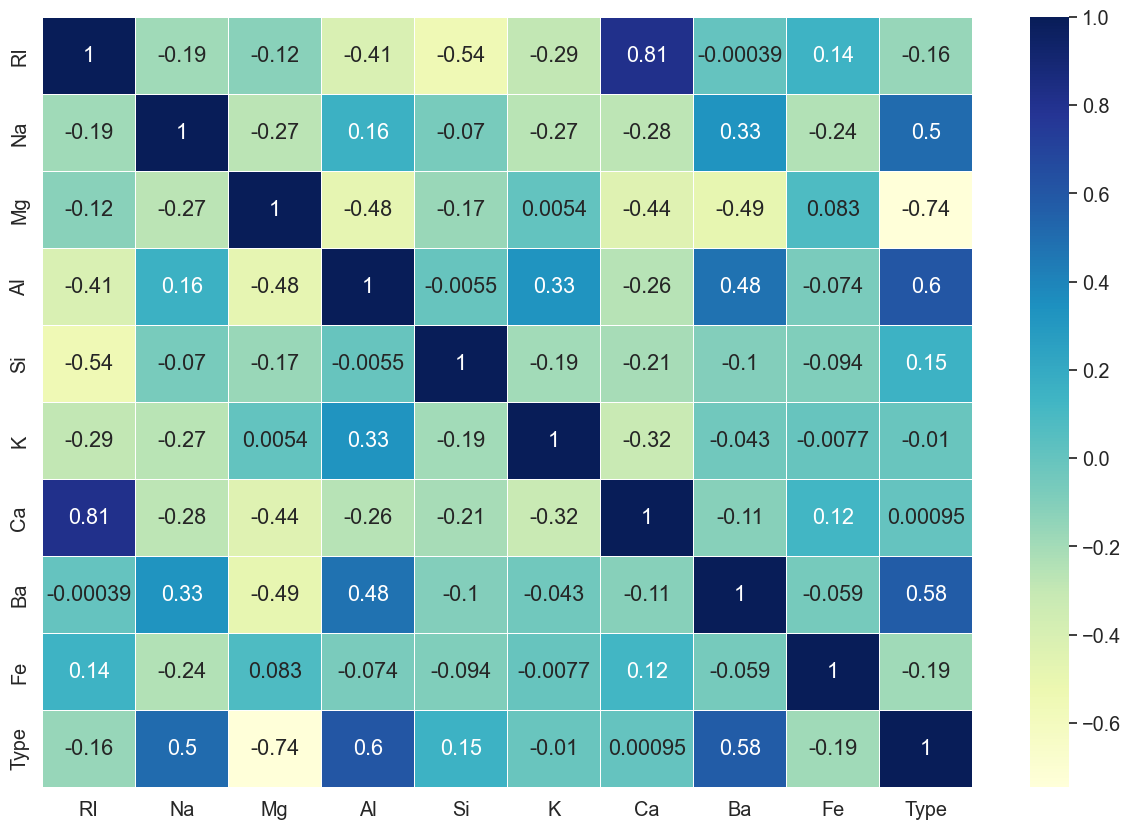

In [21]:
plt.subplots(figsize=(15,10))
sns.heatmap(glass_df.corr(),cmap='YlGnBu',annot=True, linewidth=.5)

                     P1    P2    P3    P4    P5   P6    P7   P8   P9
Explained_Variance  3.0  1.66  0.68  0.64  0.21  0.1  0.01  0.0  0.0


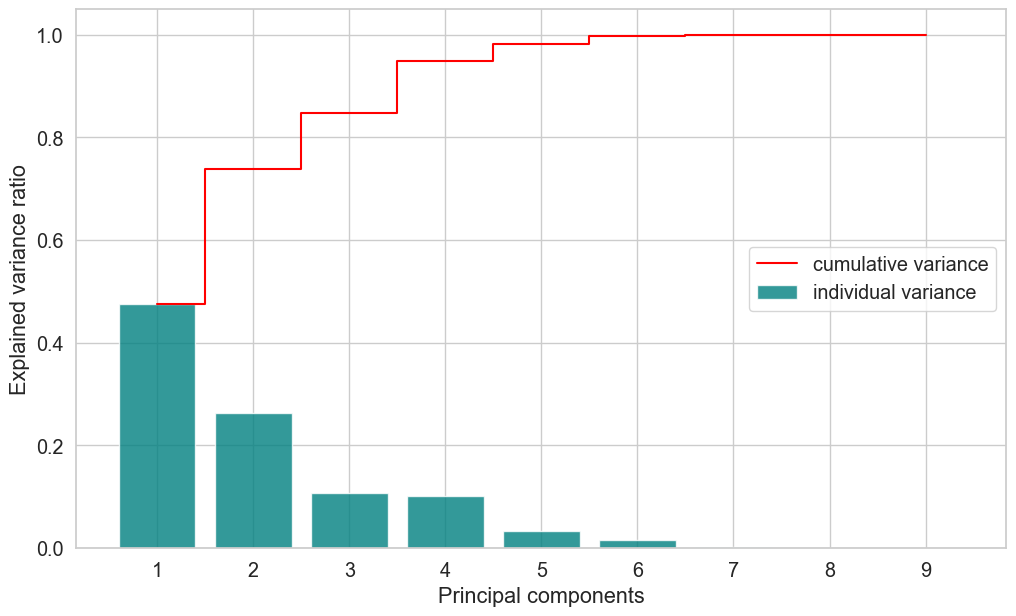

In [22]:
# Performing PCA
X_var = glass_df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
pca = PCA(random_state = 1)
pca.fit(X_var)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
var_df = pd.DataFrame(pca.explained_variance_.round(2), index=["P" + str(i) for i in range(1,10)],
                      columns=["Explained_Variance"])
print(var_df.T)
plt.figure(figsize=(12,7))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance', color='teal', alpha = 0.8)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

## Model Development

In [23]:
pca_red = PCA(n_components=9)
X_reduced = pca_red.fit_transform(X_var)

In [24]:
pca_red

PCA(n_components=9)

In [25]:
X_reduced

array([[-1.43142469e+00, -1.10211499e+00, -1.06695840e+00, ...,
        -6.77563850e-02,  1.13765010e-02, -9.44871904e-04],
       [-1.43670679e+00,  3.43585271e-01, -2.77823603e-01, ...,
        -4.31684324e-02, -1.70475229e-02, -9.55410401e-04],
       [-1.42732181e+00,  3.45720096e-01,  1.38707610e-01, ...,
        -4.54621384e-02,  1.96120011e-02, -3.50637293e-04],
       ...,
       [ 1.77887835e+00,  2.73133297e+00,  2.83222793e-02, ...,
        -2.64156217e-02,  1.26778398e-02, -3.71185216e-03],
       [ 1.79589397e+00,  2.71516839e+00,  1.48468080e-01, ...,
        -2.97701257e-02, -2.49967470e-02,  4.01381944e-04],
       [ 1.90451734e+00,  2.57907549e+00,  5.70943083e-02, ...,
        -3.81317273e-02, -1.80879099e-02,  2.89144988e-04]])

In [26]:
# Separating the response (y) and explanatory (x) variables
X = X_reduced
y = glass_df["Type"].values

In [27]:
X

array([[-1.43142469e+00, -1.10211499e+00, -1.06695840e+00, ...,
        -6.77563850e-02,  1.13765010e-02, -9.44871904e-04],
       [-1.43670679e+00,  3.43585271e-01, -2.77823603e-01, ...,
        -4.31684324e-02, -1.70475229e-02, -9.55410401e-04],
       [-1.42732181e+00,  3.45720096e-01,  1.38707610e-01, ...,
        -4.54621384e-02,  1.96120011e-02, -3.50637293e-04],
       ...,
       [ 1.77887835e+00,  2.73133297e+00,  2.83222793e-02, ...,
        -2.64156217e-02,  1.26778398e-02, -3.71185216e-03],
       [ 1.79589397e+00,  2.71516839e+00,  1.48468080e-01, ...,
        -2.97701257e-02, -2.49967470e-02,  4.01381944e-04],
       [ 1.90451734e+00,  2.57907549e+00,  5.70943083e-02, ...,
        -3.81317273e-02, -1.80879099e-02,  2.89144988e-04]])

In [28]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7], dtype=int64)

In [32]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform labels in y_train
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform labels in y_test (using the same encoder fitted on y_train)
y_test_encoded = label_encoder.transform(y_test)

# Check the unique values in the transformed y_train and y_test
print(np.unique(y_train_encoded))
print(np.unique(y_test_encoded))

[0 1 2 3 4 5]
[0 1 2 3 4 5]


## Testing Candidate models

In [33]:
# Support Vector Machines
svmMod = SVC()
svmMod.fit(X_train,y_train)
y_pred = svmMod.predict(X_test)
sc1 = metrics.accuracy_score(y_pred,y_test)

In [34]:
y_pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 6, 5, 2, 1, 1, 2, 1, 7,
       7, 7, 2, 2, 1, 1, 5, 1, 1, 2, 2, 2, 1, 7, 5, 1, 1, 2, 1, 7, 1],
      dtype=int64)

In [35]:
sc1

0.7209302325581395

In [36]:
# Gradient Boost Classifier
gbmMod = GradientBoostingClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 1)
gbmMod.fit(X_train,y_train)
y_pred = gbmMod.predict(X_test)
sc2 = metrics.accuracy_score(y_pred,y_test)

In [37]:
y_pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 5, 5, 1, 2, 6, 5, 3, 1, 1, 6, 2, 7,
       7, 7, 1, 2, 1, 1, 2, 1, 1, 2, 3, 1, 1, 7, 5, 3, 1, 2, 2, 7, 1],
      dtype=int64)

In [38]:
sc2

0.813953488372093

In [39]:
# Decision Tree
DecTree = tree.DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
y_pred = DecTree.predict(X_test)
sc3 = metrics.accuracy_score(y_pred,y_test)

In [40]:
sc3

0.6744186046511628

In [41]:
# Random Forest
RandFor = RandomForestClassifier(max_depth = 3, min_samples_split=2, n_estimators = 50, random_state = 1)
RandFor.fit(X_train, y_train)
y_pred = RandFor.predict(X_test)
sc4 = metrics.accuracy_score(y_pred,y_test)

In [42]:
sc4

0.6976744186046512

In [43]:
print(DecTree.feature_importances_)
print(RandFor.feature_importances_)
print(gbmMod.feature_importances_)

[0.18073801 0.23754156 0.0203273  0.15028387 0.03977481 0.12024119
 0.06703849 0.02693507 0.15711969]
[0.21035229 0.28206443 0.02839883 0.16434948 0.06101747 0.13133521
 0.03634492 0.03263398 0.05350339]
[0.20531962 0.21995801 0.03257608 0.18067994 0.06540785 0.06162469
 0.09653685 0.04411849 0.09377846]


In [44]:
# Compare accuracy of models
pd.DataFrame([['Support Vector Machine',sc1],['Gradient Boost',sc2],
                             ['Decision Tree',sc3],['Random Forest',sc4]],
                                 columns=['Model','Accuracy'])

,Model,Accuracy
0,Support Vector Machine,0.720930
1,Gradient Boost,0.813953
2,Decision Tree,0.674419
3,Random Forest,0.697674


In [45]:
#Hyperparameter tuning

tuned_parameters = [{'kernel': ['rbf','linear'], 'gamma': [0.001, 0.01, 0.1, 10],
                     'C': [0.001, 0.01, 0.1, 1, 10]}]
grid = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(grid.best_params_)

Best parameters set found on development set:

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [46]:
#Running final model

model = grid.best_estimator_
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
metrics.accuracy_score(y_pred,y_test)

0.7441860465116279

## Model Performance

Text(269.25, 0.5, 'predicted label')

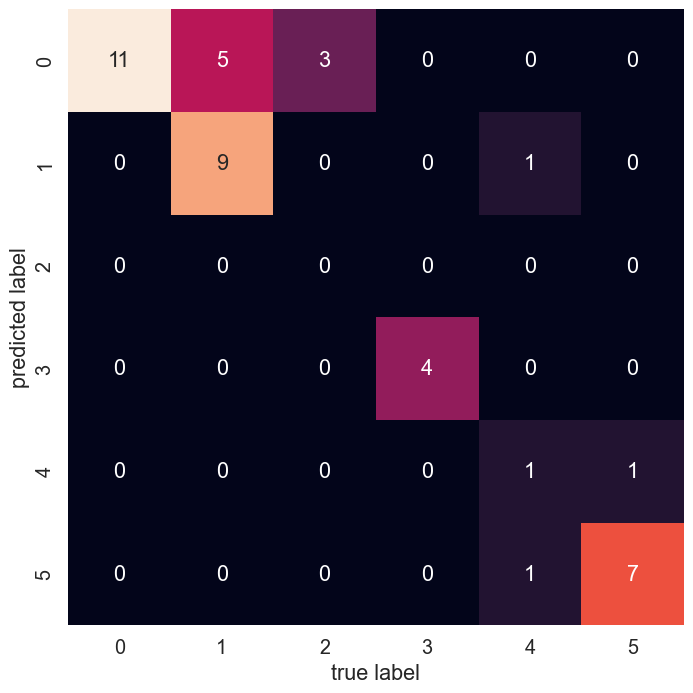

In [47]:
# Let's plot the confusion matrix
mat = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(12,8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.58      1.00      0.73        11
           2       0.90      0.64      0.75        14
           3       0.00      0.00      0.00         3
           5       1.00      1.00      1.00         4
           6       0.50      0.33      0.40         3
           7       0.88      0.88      0.88         8

    accuracy                           0.74        43
   macro avg       0.64      0.64      0.63        43
weighted avg       0.73      0.74      0.72        43



In [49]:
glass_df.shape

(214, 10)

In [50]:
cor=glass_df.corr()
cor.style.background_gradient(cmap='Purples')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [51]:
x=glass_df.iloc[:,0:10]
y=glass_df['Type']

In [52]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [53]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [54]:
xtr,xts,ytr,yts=train_test_split(x,y,test_size=0.2,random_state=0)

In [55]:
xtr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
16,1.51784,12.68,3.67,1.16,73.11,0.61,8.70,0.0,0.00,1
135,1.51789,13.19,3.90,1.30,72.33,0.55,8.44,0.0,0.28,2
122,1.51687,13.23,3.54,1.48,72.84,0.56,8.10,0.0,0.00,2
22,1.51736,12.78,3.62,1.29,72.79,0.59,8.70,0.0,0.00,1
80,1.51592,12.86,3.52,2.12,72.66,0.69,7.97,0.0,0.00,2
...,...,...,...,...,...,...,...,...,...,...
67,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.4,0.09,7
117,1.51708,13.72,3.68,1.81,72.06,0.64,7.88,0.0,0.00,2
47,1.52667,13.99,3.70,0.71,71.57,0.02,9.82,0.0,0.10,1


In [56]:
xts

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
197,1.51727,14.70,0.00,2.34,73.28,0.00,8.95,0.66,0.00,7
37,1.51797,12.74,3.48,1.35,72.96,0.64,8.68,0.00,0.00,1
89,1.51640,12.55,3.48,1.87,73.23,0.63,8.08,0.00,0.09,2
176,1.51905,14.00,2.39,1.56,72.37,0.00,9.57,0.00,0.00,6
170,1.52369,13.44,0.00,1.58,72.22,0.32,12.24,0.00,0.00,5
75,1.51590,13.02,3.58,1.51,73.12,0.69,7.96,0.00,0.00,2
96,1.51841,13.02,3.62,1.06,72.34,0.64,9.13,0.00,0.15,2
137,1.51711,12.89,3.62,1.57,72.96,0.61,8.11,0.00,0.00,2
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
83,1.51594,13.09,3.52,1.55,72.87,0.68,8.05,0.00,0.09,2


In [57]:
ytr

16     1
135    2
122    2
22     1
80     2
      ..
67     1
192    7
117    2
47     1
172    5
Name: Type, Length: 171, dtype: int64

In [58]:
yts

197    7
37     1
89     2
176    6
170    5
75     2
96     2
137    2
5      1
83     2
55     1
145    2
160    3
112    2
74     2
202    7
126    2
12     1
153    3
158    3
168    5
141    2
194    7
189    7
144    2
18     1
208    7
15     1
86     2
71     2
7      1
63     1
143    2
97     2
136    2
162    3
33     1
154    3
90     2
191    7
106    2
180    6
139    2
Name: Type, dtype: int64

In [59]:
mod=RandomForestClassifier()

In [60]:
mod

RandomForestClassifier()

In [61]:
mod.fit(xtr,ytr)

RandomForestClassifier()

In [62]:
pred=mod.predict(xts)
print(pred)

[7 1 2 6 5 2 2 2 1 2 1 2 3 2 2 7 2 1 3 3 5 2 7 7 2 1 7 1 2 2 1 1 2 2 2 3 1
 3 2 7 2 6 2]


In [65]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix

In [66]:
# Confuse Matrix
c=confusion_matrix(yts,pred)
print("Confusion Matrix is: \n",c)

Confusion Matrix is: 
 [[ 9  0  0  0  0  0]
 [ 0 19  0  0  0  0]
 [ 0  0  5  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]


In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

Accuracy: 0.767
Precision: 0.777
Recall: 0.767
F1-score: 0.760


## Bagging and Boosting Methods

In [84]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Bagging (Random Forest)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)

# Boosting (AdaBoost)
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
ada_y_pred = ada_model.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_y_pred)

print(f"Random Forest (Bagging) Accuracy: {rf_accuracy:.3f}")
print(f"AdaBoost (Boosting) Accuracy: {ada_accuracy:.3f}")


Random Forest (Bagging) Accuracy: 0.767
AdaBoost (Boosting) Accuracy: 0.349


## Additional Notes:

## 1. Explain Bagging and Boosting methods. How is it different from each other.
## * Bagging (Bootstrap Aggregating):
It is an ensemble technique that trains multiple models independently on random subsets of the data and combines their predictions, usually by voting (classification) or averaging (regression). The goal is to reduce the model’s variance and improve stability, especially with high-variance models like decision trees. A popular example of bagging is the Random Forest algorithm.

## * Boosting:
On the other hand, This technique trains models sequentially, where each new model is trained to correct the mistakes made by the previous ones. It gives more weight to the data points that were misclassified, making subsequent models focus on them. Boosting aims to reduce both bias and variance, making weak learners into strong ones. Examples of boosting algorithms include AdaBoost, Gradient Boosting, and XGBoost.

## Key Differences:(Bagging V/S Boosting)
    
Training: Bagging trains models in parallel, while Boosting trains them sequentially.
    
Objective: Bagging reduces variance, while Boosting reduces both bias and variance.
    
Focus on Data: In Bagging, all models treat data equally, while in Boosting, each model focuses more on previously misclassified instances.
    
Examples: Random Forest (Bagging) vs. AdaBoost, Gradient Boosting (Boosting).

## 2. Explain how to handle imbalance in the data.
Imbalanced datasets occur when the number of observations in different classes is not evenly distributed. For instance, in a binary classification problem, one class may have significantly more samples than the other. Here are several strategies to handle class imbalance:

1. Resampling Techniques
* Oversampling: Increase the number of instances in the minority class by duplicating existing instances or generating synthetic examples (e.g., using SMOTE - Synthetic        Minority Over-sampling Technique).    
* Undersampling: Reduce the number of instances in the majority class by randomly removing samples. This can lead to loss of important information.
    
2. Adjust Class Weights

Many machine learning algorithms allow you to set class weights, which helps to pay more attention to the minority class during model training. This can be especially effective with tree-based models and logistic regression.

3. Use Anomaly Detection Algorithms

If the minority class is extremely small, you may treat it as an anomaly detection problem. Algorithms designed for detecting anomalies (like Isolation Forest or One-Class SVM) can sometimes be more effective in such scenarios.